In [1]:
import pyemu,os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

setting random seed


# NOW Building from reg11

Kinda nutty, but we've set HK in layer 4 to be low and HK in layer 6 to be pretty high (consistent with pumping test). We then rebalanced after a `noptmax=0` run. We expect HK to drop in layer 6 and rise in 4, but hopefully not too much.....

### Read in the PEST control file and residuals

In [2]:
inpstfile = os.path.join('..','9_Pilot_Points','reg11_major','chip_pp_reg11.pst')
pstfile_reg9 = os.path.join('..','9_Pilot_Points','data','chip_pp_reg9.pst')
outpstfile = os.path.join('..','9_Pilot_Points','data','chip_pp_reg12.pst')

In [3]:
inpst = pyemu.Pst(inpstfile)
inpst9 = pyemu.Pst(pstfile_reg9)

### Check out the current arrangement of components

In [4]:
inpst.phi

776212.41796973103

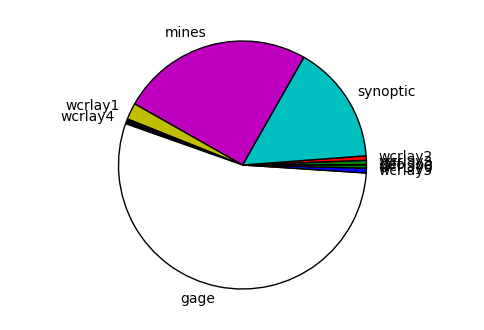

In [5]:
starting_components = inpst.phi_components_normalized
plt.axis('equal')
plt.pie([float(v) for v in starting_components.values()], labels=[k for k in starting_components.keys()]);

In [6]:
groups = ['diff', 'gage', 'geo_log', 'mines', 'synoptic', 'wcrlay1', 'wcrlay2', 'wcrlay3', 'wcrlay4', 'wcrlay5', 'wcrlay6']
groups

['diff',
 'gage',
 'geo_log',
 'mines',
 'synoptic',
 'wcrlay1',
 'wcrlay2',
 'wcrlay3',
 'wcrlay4',
 'wcrlay5',
 'wcrlay6']

In [7]:
new_portions = [0.0, 0.25, 0.0, 0.25, 0.25, .05, .03, .05, 0.06, 0.03, 0.03]
sum(new_portions)

1.0000000000000002

In [8]:
newcomponents = dict(zip(groups,[i*inpst.phi for i in new_portions]))

In [9]:
sum(newcomponents.values())

776212.41796973115

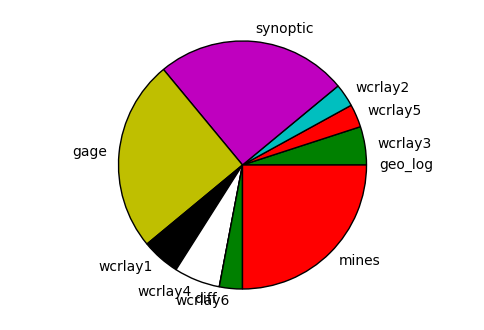

In [10]:
plt.axis('equal')
plt.pie([float(v) for v in newcomponents.values()], labels=[k for k in newcomponents.keys()]);

In [11]:
newcomponents

{'diff': 0.0,
 'gage': 194053.10449243276,
 'geo_log': 0.0,
 'mines': 194053.10449243276,
 'synoptic': 194053.10449243276,
 'wcrlay1': 38810.620898486552,
 'wcrlay2': 23286.372539091932,
 'wcrlay3': 38810.620898486552,
 'wcrlay4': 46572.745078183863,
 'wcrlay5': 23286.372539091932,
 'wcrlay6': 23286.372539091932}

In [12]:
inpst.phi_components

{'diff': 0.0,
 'gage': 422085.83461160003,
 'geo_log': 0.0,
 'mines': 194320.28409849358,
 'synoptic': 120908.99038909849,
 'wcrlay1': 16636.277270715014,
 'wcrlay2': 4441.1223576894454,
 'wcrlay3': 4755.7671223452344,
 'wcrlay4': 5091.2028776759025,
 'wcrlay5': 4795.2142944201614,
 'wcrlay6': 3177.724947693212}

In [13]:
inpst.adjust_weights(obsgrp_dict=newcomponents)
inpst.phi_components


Pst.__reset_weights() warning: phi group geo_log has zero phi, skipping...
Pst.__reset_weights() warning: phi group diff has zero phi, skipping...


{'diff': 0.0,
 'gage': 194053.10449243273,
 'geo_log': 0.0,
 'mines': 194053.10449243276,
 'synoptic': 194053.10449243279,
 'wcrlay1': 38810.620898486559,
 'wcrlay2': 23286.372539091943,
 'wcrlay3': 38810.620898486552,
 'wcrlay4': 46572.745078183856,
 'wcrlay5': 23286.372539091935,
 'wcrlay6': 23286.372539091935}

In [14]:
obscopy = inpst.observation_data.copy()

In [15]:
obscopy['implied_std'] = 1/obscopy.weight

In [16]:
obscopy.loc[obscopy.implied_std==np.inf, 'implied_std'] = np.nan

In [17]:
obscopy.dropna(inplace=True)
obscopy.head()

,obsnme,obsval,weight,obgnme,implied_std
obsnme,,,,,
sss-mw-1,sss-mw-1,1063.600,1.569124,mines,0.637298
sss-mw-2,sss-mw-2,1057.219,1.569124,mines,0.637298
sss-mw-3,sss-mw-3,1056.236,1.569124,mines,0.637298
sss-mw-4,sss-mw-4,1081.600,1.569124,mines,0.637298
sss-mw-5,sss-mw-5,1061.170,0.313825,mines,3.186490


In [18]:
for cn,cg in obscopy.groupby('obgnme'):
    print (cn)
    print(cg.implied_std.unique())

gage
[  214.79229669  3681.15375896   303.80889497]
mines
[ 0.63729809  3.18649044]
synoptic
[   197.54852179   2602.79568893  11349.02253848   3336.7449782
    615.21700521    512.17456378   1012.03129213   9008.80234138
    811.39831723  56449.06156707  36591.83394315   2341.43908843
   1336.71174977  27230.98893125   9955.12308191  21505.02730659
    629.5721035    4940.59321912   8861.31262451   2481.24716793
   6201.36029882    538.12647218   3276.95005503   3655.90841392
   2300.36739189    684.08713501    134.81619683   2795.08520675
    369.27691139    331.04230981    383.35471825    860.29333754
   1088.01546081   9440.08687245]
wcrlay1
[ 1.75819773  1.75366638  1.77656022  1.7812108   1.74021141  1.82909285
  1.87962031  1.80005971  1.73577172  1.89532767  1.90594554  1.7446734
  1.7905859   1.92754279  1.80483431  1.84897441  1.78588629  1.74915833
  1.93852572  1.8193118   1.95523739  1.85907789  1.7953103   1.77193385
  1.83402292  1.76275303  1.76733152  1.98373941  1.972

In [19]:
inpst.control_data.noptmax=20

# Now shenanagins to replace the prior information with that from reg9
We have to do this because we had earlier fixed a pilot point (`hkp6_11`) and now want to free it again

In [20]:
inpst.prior_information = inpst9.prior_information.copy()

In [21]:
inpst.parameter_data.loc['hkp6_11', 'partrans'] = 'log'

In [22]:
[inpst.parameter_data.set_value(i, 'parlbnd',1.0) for i in inpst.parameter_data.parnme.values  if 'hkp4_' in i];

In [23]:
inpst.parameter_data.loc['hkp4_1']

parnme       hkp4_1
partrans        log
parchglim    factor
parval1           2
parlbnd           1
parubnd          40
pargp         hk_pp
scale             1
offset            0
dercom            1
Name: hkp4_1, dtype: object

In [24]:
inpst.regul_lines[0] = '   3.0e+4  3.05e+4    0.1\n'

In [25]:
inpst.write(outpstfile)